In [2]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


Alicia's analysis 

(Disclaimer: Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. The raw raw version of that mid-tier ZHVI time series is also available.)

* Zillow also publishes ZHVI for all single-family residences ($, typical value for all single-family homes in a given region), for condo/coops ($), for all homes with 1, 2, 3, 4 and 5+ bedrooms ($), and the ZHVI per square foot ($, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).


In [3]:
# Extracting the path
real_estate_path = "../Data/Housing_Price/State_Home_Price_Single_Family_5Y.csv"

In [4]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data.head()

# original dataframe has 914 rows × 75 columns

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,9,0,California,State,CA,428868.0,431039.0,434305.0,437028.0,439880.0,...,572347.0,575413.0,577325.0,579140.0,582941.0,588980.0,596054.0,603158.0,610386.0,617633.0
1,54,1,Texas,State,TX,156795.0,157801.0,158879.0,159977.0,161001.0,...,209515.0,210311.0,211154.0,212057.0,213125.0,214406.0,215951.0,217863.0,219982.0,222237.0
2,43,2,New York,State,NY,268277.0,268734.0,269034.0,269440.0,269947.0,...,326694.0,327749.0,328801.0,330170.0,331930.0,334164.0,336900.0,340092.0,343510.0,346973.0
3,14,3,Florida,State,FL,180746.0,181886.0,183019.0,184152.0,185329.0,...,251098.0,252395.0,253659.0,254911.0,256194.0,257962.0,260077.0,262410.0,264768.0,267296.0
4,21,4,Illinois,State,IL,175799.0,175917.0,176426.0,177227.0,178006.0,...,207548.0,207938.0,208362.0,208898.0,209820.0,211074.0,212769.0,214659.0,216645.0,218622.0


In [5]:
# Creating a list 
real_estate_date = []
column_names = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [6]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_id = row["RegionID"]
    size_rank = row["SizeRank"]
    region_name = row["RegionName"]
    region_type = row["RegionType"]
    state_name = row["StateName"]
    for x in real_estate_date:
        dat = x.split("-")
        a ={
            "Region ID": region_id,
            "Size Rank": size_rank,
            "Region Name": region_name,
            "RegionType": region_type, 
            "State Name": state_name,
            "Date": f"{dat[1].rjust(2,'0')}-{dat[2].rjust(2,'0')}-{dat[0]}",
            "Year": dat[0],
            "Month": dat[1],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [7]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
new_RE_df.head()

,Region ID,Size Rank,Region Name,RegionType,State Name,Date,Year,Month,Housing Price
0,9,0,California,State,CA,01-31-2015,2015,01,428868.0
1,9,0,California,State,CA,02-28-2015,2015,02,431039.0
2,9,0,California,State,CA,03-31-2015,2015,03,434305.0
3,9,0,California,State,CA,04-30-2015,2015,04,437028.0
4,9,0,California,State,CA,05-31-2015,2015,05,439880.0


In [8]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
# new_RE_df.head()

# Drop duplicate 
no_duplicate_RE_df = new_RE_df.drop_duplicates()
# no_duplicate_RE_df.head()


# split city from state, make a new column with just city
no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
# no_duplicate_RE_df.head()

# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "State"}, axis="columns")
no_duplicate_RE_df


,Region ID,Size Rank,State,RegionType,State Name,Date,Year,Month,Housing Price
0,9,0,California,State,CA,01-31-2015,2015,01,428868.0
1,9,0,California,State,CA,02-28-2015,2015,02,431039.0
2,9,0,California,State,CA,03-31-2015,2015,03,434305.0
3,9,0,California,State,CA,04-30-2015,2015,04,437028.0
4,9,0,California,State,CA,05-31-2015,2015,05,439880.0
...,...,...,...,...,...,...,...,...,...
3667,62,50,Wyoming,State,WY,08-31-2020,2020,08,257141.0
3668,62,50,Wyoming,State,WY,09-30-2020,2020,09,257853.0
3669,62,50,Wyoming,State,WY,10-31-2020,2020,10,258747.0
3670,62,50,Wyoming,State,WY,11-30-2020,2020,11,260035.0


In [49]:
# pulling up only the states I needed for the housing price
# "California", "Texas", "Florida", "New York", "Illinois"
ca_timeseries_df = no_duplicate_RE_df[no_duplicate_RE_df['State'] == 'California']
tx_timeseries_df = no_duplicate_RE_df[no_duplicate_RE_df['State'] == 'Texas']
fl_timeseries_df = no_duplicate_RE_df[no_duplicate_RE_df['State'] == 'Florida']
ny_timeseries_df = no_duplicate_RE_df[no_duplicate_RE_df['State'] == 'New York']
il_timeseries_df = no_duplicate_RE_df[no_duplicate_RE_df['State'] == 'Illinois']


In [50]:
# Combine 5 states' dataframe together 
top5states = pd.concat([ca_timeseries_df, tx_timeseries_df, fl_timeseries_df, ny_timeseries_df, il_timeseries_df])
top5states.head()

,Region ID,Size Rank,State,RegionType,State Name,Date,Year,Month,Housing Price
0,9,0,California,State,CA,01-31-2015,2015,01,428868.0
1,9,0,California,State,CA,02-28-2015,2015,02,431039.0
2,9,0,California,State,CA,03-31-2015,2015,03,434305.0
3,9,0,California,State,CA,04-30-2015,2015,04,437028.0
4,9,0,California,State,CA,05-31-2015,2015,05,439880.0


In [ ]:
# # Alternative method from Concat 
# state_filter = no_duplicate_RE_df["State"].isin(["California", "Texas", "Florida", "New York", "Illinois"])
# no_duplicate_RE_df[state_filter]

In [51]:
top5states_summary = top5states.groupby("State").describe()["Housing Price"]
top5states_summary


,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
California,72.0,519553.416667,50266.170293,428868.0,476031.75,529931.0,556357.00,617633.0
Florida,72.0,224273.902778,24271.236005,180746.0,204014.25,226903.0,244335.50,267296.0
Illinois,72.0,196113.319444,11910.782078,175799.0,185126.00,199019.0,206416.75,218622.0
New York,72.0,301285.513889,22774.317733,268277.0,279519.75,300847.0,322712.00,346973.0
Texas,72.0,189390.472222,18162.900808,156795.0,173875.50,190420.0,205464.75,222237.0


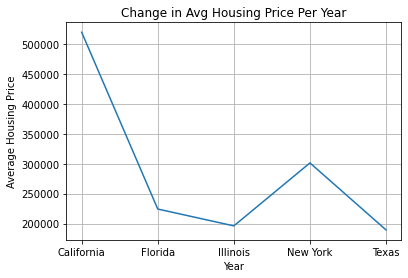

In [52]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(top5states_summary.index.values, top5states_summary["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Change in Avg Housing Price Per Year")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add x-lim and y- lim


In [53]:
# grouping the housing price by state
state_timeseries_df = top5states.groupby(["State", "Year"]).describe()["Housing Price"]
state_timeseries_df

count           mean           std       min        25%  \
State      Year                                                            
California 2015   12.0  443447.416667   9689.806260  428868.0  436347.25   
           2016   12.0  475793.083333   9318.895696  462043.0  468386.00   
           2017   12.0  509155.416667  11427.791924  492363.0  500261.00   
           2018   12.0  547004.083333   7451.660699  532091.0  542349.75   
           2019   12.0  555475.000000   4247.124888  549592.0  551697.50   
           2020   12.0  586445.500000  16941.354725  565187.0  574646.50   
Florida    2015   12.0  187394.000000   4540.562620  180746.0  183868.75   
           2016   12.0  203562.833333   4812.922432  196022.0  199927.75   
           2017   12.0  219289.833333   4779.426455  212078.0  215580.50   
           2018   12.0  234256.833333   4400.071112  227359.0  230827.50   
           2019   12.0  244542.916667   2147.699888  241445.0  242695.00   
           2020   12.0  256597.000000   6020.688121  248612.0  252070.75   
Illinois   2015   12.0  178086.166667   1448.894929  175799.0  177026.75   
           2016   12.0  184982.583333   2643.472732  180694.0  183191.00   
           2017   12.0  194415.916667   2687.557677  190188.0  192503.00   
           2018   12.0  202198.916667   1689.709575  199443.0  200793.00   
           2019   12.0  206135.000000    888.213017  204534.0  205538.00   
           2020   12.0  210861.333333   3958.176608  206875.0  207840.50   
New York   2015   12.0  271186.583333   2154.596333  268277.0  269338.50   
           2016   12.0  279478.000000   3111.551148  274832.0  277254.00   
           2017   12.0  292692.250000   4859.901105  285946.0  288528.25   
           2018   12.0  309403.083333   5007.007153  301535.0  305616.25   
           2019   12.0  321798.333333   2316.207650  317427.0  320203.75   
           2020   12.0  333154.833333   7268.887446  324980.0  327485.25   
Texas      2015   12.0  162347.583333   3530.217260  156795.0  159702.50   
           2016   12.0  173643.083333   3494.541001  168457.0  170885.00   
           2017   12.0  185207.416667   3144.230458  180239.0  182934.50   
           2018   12.0  196078.583333   3383.524829  190805.0  193451.00   
           2019   12.0  205413.833333   2081.106342  201865.0  203814.75   
           2020   12.0  213652.333333   4528.369751  208392.0  210112.00   

                      50%        75%       max  
State      Year                                 
California 2015  443158.5  450554.50  458956.0  
           2016  475454.5  483019.50  489947.0  
           2017  509185.5  517192.25  527771.0  
           2018  550412.5  552935.25  553410.0  
           2019  556767.0  558260.00  562173.0  
           2020  581040.5  597830.00  617633.0  
Florida    2015  187174.0  190862.50  194542.0  
           2016  203647.5  207296.75  210749.0  
           2017  219321.5  223009.50  226447.0  
           2018  234690.0  237717.25  240484.0  
           2019  244580.0  246244.00  247772.0  
           2020  255552.5  260660.25  267296.0  
Illinois   2015  178373.5  179153.75  180096.0  
           2016  184931.0  186871.25  189188.0  
           2017  194420.5  196367.00  198595.0  
           2018  202467.5  203579.75  204412.0  
           2019  206452.5  206757.25  207143.0  
           2020  209359.0  213241.50  218622.0  
New York   2015  270993.0  273006.50  274400.0  
           2016  279346.5  281598.50  284703.0  
           2017  292619.0  296466.00  300159.0  
           2018  309530.0  313538.75  316433.0  
           2019  322879.0  323580.50  324138.0  
           2020  331050.0  337698.00  346973.0  
Texas      2015  162503.0  165070.25  167521.0  
           2016  173613.0  176251.00  179186.0  
           2017  185241.0  187495.50  190035.0  
           2018  196367.0  198731.75  200919.0  
           2019  205652.5  207303.00  207947.0  
           2020  212591.0  216429.00  222237.0

In [ ]:
#renaming the columns
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()